In [1]:
#Murat Şahin theater play statistics for istanbul analysis and modelling machine learning.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/theater-play-statistics-for-istanbul/theater_play.csv


In [10]:
import pandas as pd

# Load the new dataset with the correct encoding and delimiter
df_theater = '/kaggle/input/theater-play-statistics-for-istanbul/theater_play.csv'
 
# Display the first few rows of the dataset to understand its structure
df_theater.head()



,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE
0,2017-10-04 12:00:00 +0000 +0000,CÄ°BALÄ° KARAKOLU,Harbiye Muhsin ErtuÄrul Sahnesi,MÃ¼zikal,0,YabancÄ±,28.988829,41.046788,579
1,2017-10-04 17:30:00 +0000 +0000,CÄ°BALÄ° KARAKOLU,Harbiye Muhsin ErtuÄrul Sahnesi,MÃ¼zikal,0,YabancÄ±,28.988829,41.046788,598
2,2017-10-05 17:30:00 +0000 +0000,CÄ°BALÄ° KARAKOLU,Harbiye Muhsin ErtuÄrul Sahnesi,MÃ¼zikal,0,YabancÄ±,28.988829,41.046788,593
3,2017-10-06 17:30:00 +0000 +0000,CÄ°BALÄ° KARAKOLU,Harbiye Muhsin ErtuÄrul Sahnesi,MÃ¼zikal,0,YabancÄ±,28.988829,41.046788,595
4,2017-10-07 12:00:00 +0000 +0000,CÄ°BALÄ° KARAKOLU,Harbiye Muhsin ErtuÄrul Sahnesi,MÃ¼zikal,0,YabancÄ±,28.988829,41.046788,602


In [14]:
# Data Preprocessing

# Convert 'PLAY_DATE' to datetime
df_theater['PLAY_DATE'] = pd.to_datetime(df_theater['PLAY_DATE'], errors='coerce')
# Specify the correct date format, replace with the format of your dates
df_theater['PLAY_DATE'] = pd.to_datetime(df_theater['PLAY_DATE'], format='%d-%m-%Y', errors='coerce')

# Check for any missing values
missing_values = df_theater.isnull().sum()

# Drop rows with missing values in critical columns
df_theater_clean = df_theater.dropna(subset=['PLAY_DATE', 'NUMBER_OF_AUDIENCE'])

# Extract useful time features from 'PLAY_DATE'
df_theater_clean['Year'] = df_theater_clean['PLAY_DATE'].dt.year
df_theater_clean['Month'] = df_theater_clean['PLAY_DATE'].dt.month
df_theater_clean['Day'] = df_theater_clean['PLAY_DATE'].dt.day

# Drop unnecessary columns for the LSTM model
df_theater_clean = df_theater_clean.drop(columns=['PLAY_DATE', 'THEATER_NAME', 'PLAY_NAME', 'LONGITUDE', 'LATITUDE'])

# One-hot encode categorical variables
df_theater_clean = pd.get_dummies(df_theater_clean, columns=['PLAY_CATEGORY', 'PLAY_TYPE', 'IS_GUEST_PLAY'])

# Display the cleaned and processed data
df_theater_clean.head()


,NUMBER_OF_AUDIENCE,Year,Month,Day,PLAY_CATEGORY_GenÃ§lik Oyunu,PLAY_CATEGORY_MÃ¼zikal,PLAY_CATEGORY_YetiÅkin,PLAY_CATEGORY_Ãocuk,PLAY_TYPE_YabancÄ±,PLAY_TYPE_Yerli,IS_GUEST_PLAY_0,IS_GUEST_PLAY_1
0,579,2017,10,4,False,True,False,False,True,False,True,False
1,598,2017,10,4,False,True,False,False,True,False,True,False
2,593,2017,10,5,False,True,False,False,True,False,True,False
3,595,2017,10,6,False,True,False,False,True,False,True,False
4,602,2017,10,7,False,True,False,False,True,False,True,False


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define the feature columns and target column
features = df_theater_clean.drop(columns=['NUMBER_OF_AUDIENCE'])
target = df_theater_clean['NUMBER_OF_AUDIENCE']

# Scale the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Reshape the data for LSTM (samples, timesteps, features)
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = scaled_target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape  # Checking the shape of the data for LSTM training


((9216, 1, 11), (9216, 1))

In [20]:
pip install tensorflow







































Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install keras















Note: you may need to restart the kernel to use updated packages.


Epoch 1/20


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(**kwargs)


231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0035 - val_loss: 0.0043

Epoch 2/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0042

Epoch 3/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0043

Epoch 4/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0043

Epoch 5/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0042

Epoch 6/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - val_loss: 0.0042

Epoch 7/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0042

Epoch 8/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025 - val_loss: 0.0042

Epoch 9/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0042

Epoch 10/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0042

Epoch 11/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0042

Epoch 12/20

231/231 ━━━━━━━━━━━━━━━━━━━━ 

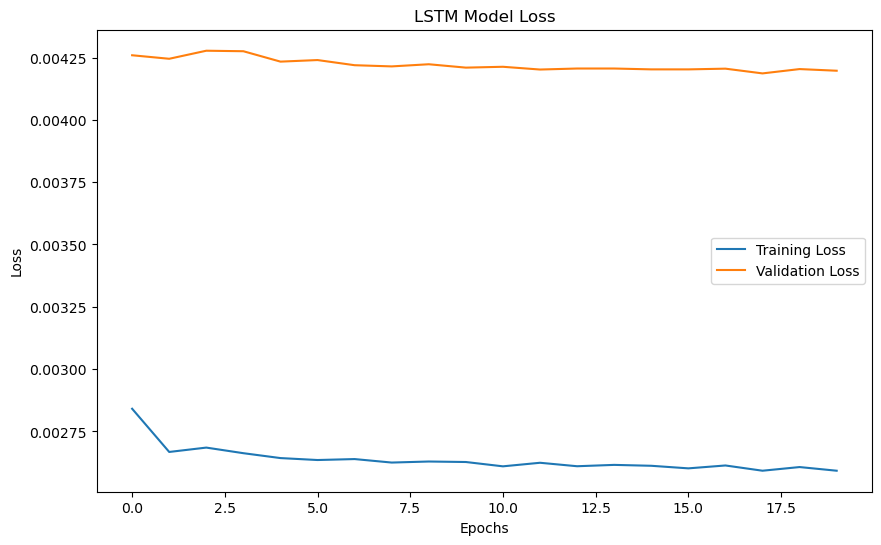

0.0647839675102666

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_lstm = model_lstm.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the RMSE of the LSTM model
rmse_lstm


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23680\3525789659.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df_theater['PLAY_DATE'] = pd.to_datetime(df_theater['PLAY_DATE'], errors='coerce')


Baseline Model RMSE: 111.57298332326864

Baseline Model R-squared: 0.8581409910535813


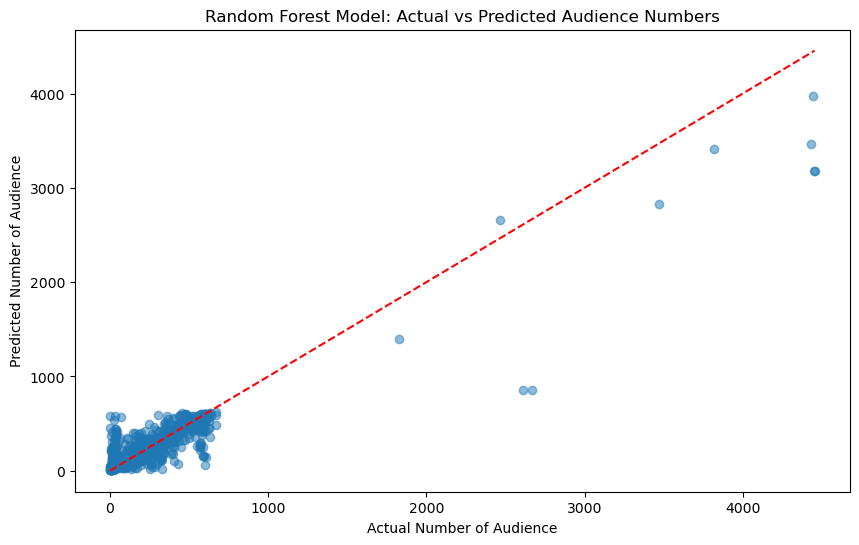

Tuned Model RMSE: 111.57298332326864

Tuned Model R-squared: 0.8581409910535813

Baseline Model RMSE: 111.57298332326864, Tuned Model RMSE: 111.57298332326864

Baseline Model R2: 0.8581409910535813, Tuned Model R2: 0.8581409910535813


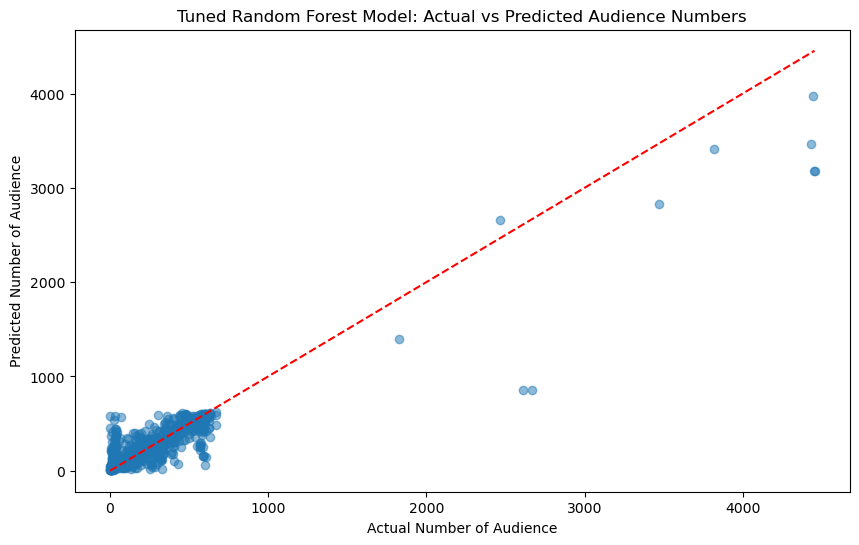

In [64]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\Murat\IBB Datasets\theater_play.csv'
df_theater = pd.read_csv(file_path, encoding='ISO-8859-9', delimiter=',')

# Convert 'PLAY_DATE' to datetime
df_theater['PLAY_DATE'] = pd.to_datetime(df_theater['PLAY_DATE'], errors='coerce')

# Feature engineering: Extract year and month from 'PLAY_DATE'
df_theater['Year'] = df_theater['PLAY_DATE'].dt.year
df_theater['Month'] = df_theater['PLAY_DATE'].dt.month

# Ensure no other missing values in the dataset
df_theater.fillna(0, inplace=True)

# Define target and features
X = df_theater.drop(columns=['PLAY_DATE', 'NUMBER_OF_AUDIENCE'])  # Drop unnecessary columns including target
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummies
y = df_theater['NUMBER_OF_AUDIENCE']  # Target variable is the number of audience

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model using RandomForest
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate Baseline Model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_r2 = r2_score(y_test, y_pred_baseline)
print(f"Baseline Model RMSE: {baseline_rmse}")
print(f"Baseline Model R-squared: {baseline_r2}")

# Plot predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_baseline, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Number of Audience')
plt.ylabel('Predicted Number of Audience')
plt.title('Random Forest Model: Actual vs Predicted Audience Numbers')
plt.show()

# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_rf.best_estimator_

# Predictions using the tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate Tuned Model
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)
print(f"Tuned Model RMSE: {tuned_rmse}")
print(f"Tuned Model R-squared: {tuned_r2}")

# Compare the baseline and tuned model
print(f"Baseline Model RMSE: {baseline_rmse}, Tuned Model RMSE: {tuned_rmse}")
print(f"Baseline Model R2: {baseline_r2}, Tuned Model R2: {tuned_r2}")

# Plot predictions vs actuals for the tuned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Number of Audience')
plt.ylabel('Predicted Number of Audience')
plt.title('Tuned Random Forest Model: Actual vs Predicted Audience Numbers')
plt.show()
